# 멕시코풍 프랜차이즈 chipotle의 주문 데이터 분석하기

In [1]:
import pandas as pd

## 1. 데이터의 기초 정보 살펴보기 

In [2]:
file_path = '../data/chipotle.tsv'
chipo = pd.read_csv(file_path, sep='\t')
print(chipo.shape)

(4622, 5)


In [3]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [4]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


* 0 order_id : 주문번호 
* 1 quantity : 아이템 주문 수량
* 2 item_name : 주문한 아이템 이름 
* 3 choice_description : 주문한 아이템의 상세 선택 옵션 
* 4 item_price : 주문 아이템의 가격 정보 

In [6]:
print(chipo.columns)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [7]:
print(chipo.index)

RangeIndex(start=0, stop=4622, step=1)


In [9]:
chipo.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


#### order_id는 숫자의 의미를 갖지 않기 때문에 문자열로 변환 

In [10]:
chipo['order_id'] = chipo['order_id'].astype(str)
chipo.describe()

,quantity
count,4622.000000
mean,1.075725
std,0.410186
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


#### order_id와 item_name 갯수 

In [11]:
print(len(chipo['order_id'].unique()))
print(len(chipo.item_name.unique()))

1834
50


## 2. 탐색과 시각화하기

### 가장 많이 주문한 아이템 Top 10

In [12]:
item_count = chipo['item_name'].value_counts()[:10]
for idx, (val, cnt) in enumerate(item_count.iteritems(), 1):
    print("Top", idx, ":", val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Chips 211
Top 7 : Steak Bowl 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chicken Salad Bowl 110


### 아이템별 주문 개수와 총량 

In [18]:
order_count = chipo.groupby('item_name')['order_id'].count() # 주문 개수
order_count[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [19]:
item_quantity = chipo.groupby('item_name')['quantity'].sum()  # 주문 총량 
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

### 시각화 

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [24]:
item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

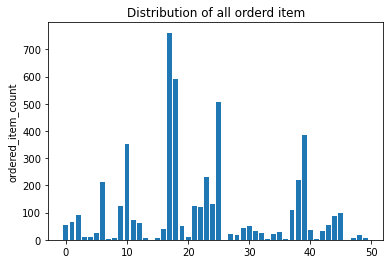

In [25]:
plt.bar(x_pos, order_cnt, align="center")
plt.ylabel('ordered_item_count')
plt.title('Distribution of all orderd item')
plt.show()